In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
# function grad  :tinh dao ham
def grad(x):
    return 2*x +5*np.cos(x)
# f(x)
def cost(x):
    return x**2 + 5 *np.sin(x)
# thuat toan gradient descent ( eta: learning rate, xo = xt)
def GD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] -eta*grad(x[-1])
        x.append(x_new)
        if(abs(grad(x[-1]))<1e-3):
            break
    return (x,it)
(x1,it1)  = GD1(0.1,-5)
(x2, it2)  = GD1(0.1,5)
print(x1)
print(x2)
print('solution - local minium: ',x1[-1],' interation :',it1)
print('solution - local minium: ',x2[-1],' interation :',it2)

[-5, -4.141831092731613, -3.0434140487394945, -1.9371390635788721, -1.370609623535342, -1.1959138533062952, -1.1398126662660861, -1.1207324901805855, -1.1140974995041208, -1.1117718342401366, -1.1109543623859697, -1.1106667365268623, -1.1105655006818749]
[5, 3.8581689072683867, 3.463564567930569, 3.2451582916682646, 3.0934475688734215, 2.9741786797296776, 2.8723524342019475, 2.7798685851337033, 2.691538912182054, 2.6034429924417726, 2.512083663118539, 2.413825273788166, 2.3043909242955314, 2.178284700900974, 2.028031263811057, 1.8431593967550366, 1.6090315913519224, 1.3063382475764564, 0.9143774850440367, 0.42636006838025575, -0.11415049832376245, -0.5880663503407273, -0.8864605464168874, -1.0252476809653677, -1.079641732011138, -1.0995355411928174, -1.1066334337506414, -1.1091439570842945, -1.1100292207856688, -1.1103410483948122, -1.1104508458600801]
solution - local minium:  -1.1105655006818749  interation : 11
solution - local minium:  -1.1104508458600801  interation : 29


 weight [[3.98871776 3.00889885]]


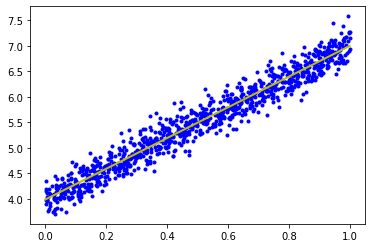

check gradient: True
solution of Gradient: [[4.00350958]
 [2.98193473]] iteration: 619


In [41]:
# Gradient cho hàm số nhiều biến
# quay lại với Linear Regression
import matplotlib.pyplot as plt
import math
import numpy as np
np.random.seed(12)
# tạo 1000 điểm dữ liệu gần với đt y =4 +3x
X = np.random.rand(1000,1)
# print(X)
y = 4 +3*X+ 0.2 *np.random.randn(1000,1) #noise added
# Building Xbar
one = np.ones((X.shape[0],1))
# print(one)
# Xbar concatenate
Xbar = np.concatenate((one, X), axis =1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print(' weight', w.T)
#display result
w0 = w[0][0]
w1 = w[1][0]
x0 =np.linspace(0,1,2)
y0 = w0 + w1 *x0
plt.plot(X,y,'b.')
plt.plot(x0,y0,'y', linewidth=2)
plt.show()

# viết đạo hàm và tính hàm mất mát
def Grad(w):
    N = Xbar.shape[0]
    return 1/N*Xbar.T.dot(Xbar.dot(w)- y)
def Cost(w):
    N = Xbar.shape[0]
    return 0.5/N*np.linalg.norm(y - Xbar.dot(w),2)**2
# kiểm tra đạo hàm
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] +=eps
        w_n[i] -=eps
        g[i] = (cost(w_p)- cost(w_n))/(2*eps)
    return g
def check_grad(w, grad, cost):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = Grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1-grad2)< 1e-6 else False
print("check gradient:", check_grad(np.random.rand(2,1),Grad,Cost))

# viết hàm  gradient descent
def MyGD(w_init, grad, eta):
    w = [w_init]
    for it in range(1000):
        w_new = w[-1] -eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)
w_init = np.array([[4],[1]])
(w, it ) = MyGD(w_init, Grad, 0.1)
print('solution of Gradient:', w[-1],'iteration:' ,it)